

```
  Author: Raj Maurya
  Roll No.: B23406
  Date: 1st Oct'24
  Time: 19:45
  Sources: IITM-Nptel and a famous research paper suggested by them.
  Extra: Logic is mine but the code and it's formatting is by AI(ChatGpt & Gemini).
```





```
To approximate the bessel's differential equations.
```



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Bessel equation of order p
def bessel_equation(x, p):
    y = np.zeros_like(x) # Create an array y with the same shape as x
    if x.size > 0: # Check if x is not empty
        y = x**2 * np.gradient(np.gradient(y, x), x) + x * np.gradient(y, x) + (x**2 - p**2) * y
    return y # Return the calculated y

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 128)  # input layer (1) -> hidden layer (128)
        self.fc2 = nn.Linear(128, 128)  # hidden layer (128) -> hidden layer (128)
        self.fc3 = nn.Linear(128, 1)  # hidden layer (128) -> output layer (1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # activation function for hidden layer
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate training data
x = np.linspace(0, 10, 100)
p = 2
y = bessel_equation(x, p) # Calculate y using the modified bessel_equation

# Train the neural network
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)

for epoch in range(10000):  # loop over the dataset multiple times
    inputs = torch.tensor(x, dtype=torch.float32).unsqueeze(1) # Add an extra dimension to inputs
    labels = torch.tensor(y, dtype=torch.float32).unsqueeze(1) # Add an extra dimension to labels

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    print('Epoch %d, Loss: %.3f' % (epoch+1, loss.item()))

# Evaluate the neural network
test_x = np.linspace(0, 10, 100)
test_y = bessel_equation(test_x, p) # Calculate test_y using the modified bessel_equation

test_inputs = torch.tensor(test_x, dtype=torch.float32).unsqueeze(1) # Add an extra dimension to test_inputs
test_outputs = net(test_inputs)
print('Test Loss: %.3f' % criterion(test_outputs, torch.tensor(test_y, dtype=torch.float32).unsqueeze(1)).item()) # Add an extra dimension to test_y

Streaming output truncated to the last 5000 lines.
Epoch 5002, Loss: 0.000
Epoch 5003, Loss: 0.000
Epoch 5004, Loss: 0.000
Epoch 5005, Loss: 0.000
Epoch 5006, Loss: 0.000
Epoch 5007, Loss: 0.000
Epoch 5008, Loss: 0.000
Epoch 5009, Loss: 0.000
Epoch 5010, Loss: 0.000
Epoch 5011, Loss: 0.000
Epoch 5012, Loss: 0.000
Epoch 5013, Loss: 0.000
Epoch 5014, Loss: 0.000
Epoch 5015, Loss: 0.000
Epoch 5016, Loss: 0.000
Epoch 5017, Loss: 0.000
Epoch 5018, Loss: 0.000
Epoch 5019, Loss: 0.000
Epoch 5020, Loss: 0.000
Epoch 5021, Loss: 0.000
Epoch 5022, Loss: 0.000
Epoch 5023, Loss: 0.000
Epoch 5024, Loss: 0.000
Epoch 5025, Loss: 0.000
Epoch 5026, Loss: 0.000
Epoch 5027, Loss: 0.000
Epoch 5028, Loss: 0.000
Epoch 5029, Loss: 0.000
Epoch 5030, Loss: 0.000
Epoch 5031, Loss: 0.000
Epoch 5032, Loss: 0.000
Epoch 5033, Loss: 0.000
Epoch 5034, Loss: 0.000
Epoch 5035, Loss: 0.000
Epoch 5036, Loss: 0.000
Epoch 5037, Loss: 0.000
Epoch 5038, Loss: 0.000
Epoch 5039, Loss: 0.000
Epoch 5040, Loss: 0.000
Epoch 5041, L



```
To print the exact and approximated solutions too.
```



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import jv

# Define the Bessel equation of order p
def bessel_equation(x, p):
    return jv(p, x)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 128)  # input layer (1) -> hidden layer (128)
        self.fc2 = nn.Linear(128, 128)  # hidden layer (128) -> hidden layer (128)
        self.fc3 = nn.Linear(128, 1)  # hidden layer (128) -> output layer (1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # activation function for hidden layer
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate training data
x = np.linspace(0, 10, 100)
p = 2
y_exact = bessel_equation(x, p)

# Generate approximate data using the neural network
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for epoch in range(10000):  # loop over the dataset multiple times
    inputs = torch.tensor(x, dtype=torch.float32).view(-1, 1)
    labels = torch.tensor(y_exact, dtype=torch.float32).view(-1, 1)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    print('Epoch %d, Loss: %.3f' % (epoch+1, loss.item()))

# Evaluate the neural network
test_x = np.linspace(0, 10, 100)
test_y_exact = bessel_equation(test_x, p)

test_inputs = torch.tensor(test_x, dtype=torch.float32).view(-1, 1)
test_outputs = net(test_inputs)

# Print exact and approximate solutions
print("Exact Solutions:")
print(test_y_exact)
print("Approximate Solutions:")
print(test_outputs.detach().numpy())

Streaming output truncated to the last 5000 lines.
Epoch 5120, Loss: 0.001
Epoch 5121, Loss: 0.001
Epoch 5122, Loss: 0.001
Epoch 5123, Loss: 0.001
Epoch 5124, Loss: 0.001
Epoch 5125, Loss: 0.001
Epoch 5126, Loss: 0.001
Epoch 5127, Loss: 0.001
Epoch 5128, Loss: 0.001
Epoch 5129, Loss: 0.001
Epoch 5130, Loss: 0.001
Epoch 5131, Loss: 0.001
Epoch 5132, Loss: 0.001
Epoch 5133, Loss: 0.001
Epoch 5134, Loss: 0.001
Epoch 5135, Loss: 0.001
Epoch 5136, Loss: 0.001
Epoch 5137, Loss: 0.001
Epoch 5138, Loss: 0.001
Epoch 5139, Loss: 0.001
Epoch 5140, Loss: 0.001
Epoch 5141, Loss: 0.001
Epoch 5142, Loss: 0.001
Epoch 5143, Loss: 0.001
Epoch 5144, Loss: 0.001
Epoch 5145, Loss: 0.001
Epoch 5146, Loss: 0.001
Epoch 5147, Loss: 0.001
Epoch 5148, Loss: 0.001
Epoch 5149, Loss: 0.001
Epoch 5150, Loss: 0.001
Epoch 5151, Loss: 0.001
Epoch 5152, Loss: 0.001
Epoch 5153, Loss: 0.001
Epoch 5154, Loss: 0.001
Epoch 5155, Loss: 0.001
Epoch 5156, Loss: 0.001
Epoch 5157, Loss: 0.001
Epoch 5158, Loss: 0.001
Epoch 5159, L



```
To compare solutions via Graphs and so.
```



Streaming output truncated to the last 5000 lines.
Epoch 15128, Loss: 0.000
Epoch 15129, Loss: 0.000
Epoch 15130, Loss: 0.000
Epoch 15131, Loss: 0.000
Epoch 15132, Loss: 0.000
Epoch 15133, Loss: 0.000
Epoch 15134, Loss: 0.000
Epoch 15135, Loss: 0.000
Epoch 15136, Loss: 0.000
Epoch 15137, Loss: 0.000
Epoch 15138, Loss: 0.000
Epoch 15139, Loss: 0.000
Epoch 15140, Loss: 0.000
Epoch 15141, Loss: 0.000
Epoch 15142, Loss: 0.000
Epoch 15143, Loss: 0.000
Epoch 15144, Loss: 0.000
Epoch 15145, Loss: 0.000
Epoch 15146, Loss: 0.000
Epoch 15147, Loss: 0.000
Epoch 15148, Loss: 0.000
Epoch 15149, Loss: 0.000
Epoch 15150, Loss: 0.000
Epoch 15151, Loss: 0.000
Epoch 15152, Loss: 0.000
Epoch 15153, Loss: 0.000
Epoch 15154, Loss: 0.000
Epoch 15155, Loss: 0.000
Epoch 15156, Loss: 0.000
Epoch 15157, Loss: 0.000
Epoch 15158, Loss: 0.000
Epoch 15159, Loss: 0.000
Epoch 15160, Loss: 0.000
Epoch 15161, Loss: 0.000
Epoch 15162, Loss: 0.000
Epoch 15163, Loss: 0.000
Epoch 15164, Loss: 0.000
Epoch 15165, Loss: 0.000

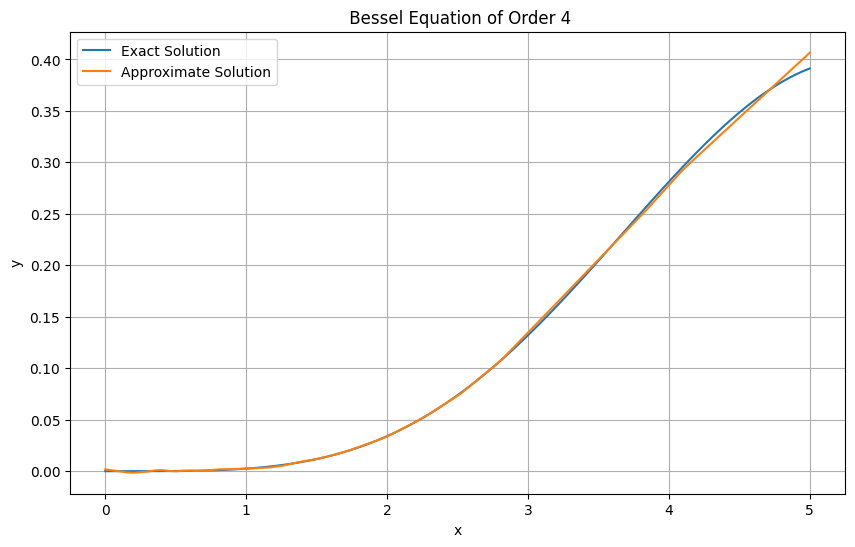

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import jv
import matplotlib.pyplot as plt

# Define the Bessel equation of order p
def bessel_equation(x, p):
    return jv(p, x)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 128)  # input layer (1) -> hidden layer (128)
        self.fc2 = nn.Linear(128, 128)  # hidden layer (128) -> hidden layer (128)
        self.fc3 = nn.Linear(128, 1)  # hidden layer (128) -> output layer (1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # activation function for hidden layer
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate training data
x = np.linspace(0, 5, 100)
p = 4
y_exact = bessel_equation(x, p)

# Generate approximate data using the neural network
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for epoch in range(20000):  # loop over the dataset multiple times
    inputs = torch.tensor(x, dtype=torch.float32).view(-1, 1)
    labels = torch.tensor(y_exact, dtype=torch.float32).view(-1, 1)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    print('Epoch %d, Loss: %.3f' % (epoch+1, loss.item()))

# Evaluate the neural network
test_x = np.linspace(0, 5, 100)
test_y_exact = bessel_equation(test_x, p)

test_inputs = torch.tensor(test_x, dtype=torch.float32).view(-1, 1)
test_outputs = net(test_inputs)

# Print exact and approximate solutions
print("Exact Solutions:")
print(test_y_exact)
print("Approximate Solutions:")
print(test_outputs.detach().numpy())

# Plot the exact and approximate solutions
plt.figure(figsize=(10, 6))
plt.plot(test_x, test_y_exact, label='Exact Solution')
plt.plot(test_x, test_outputs.detach().numpy(), label='Approximate Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f" Bessel Equation of Order {p}")
plt.legend()
plt.grid(True)
plt.show()

[Img Solution](https://drive.google.com/file/d/10v3LbWcNei3w15RiiSbAqWUnjj8d1D2K/view?usp=drive_link)

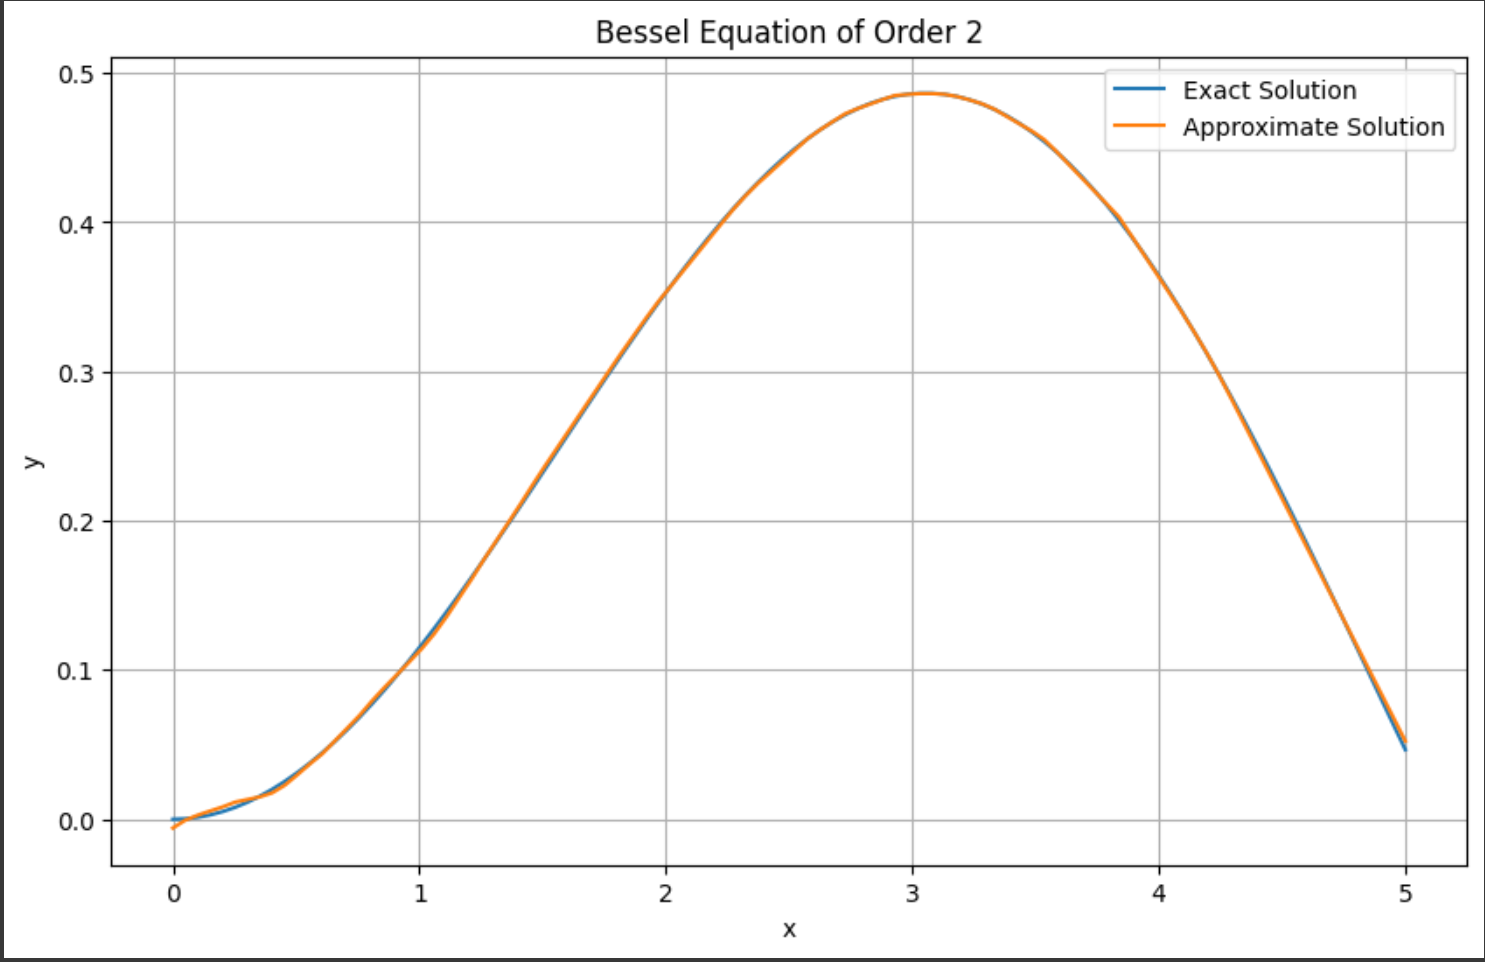

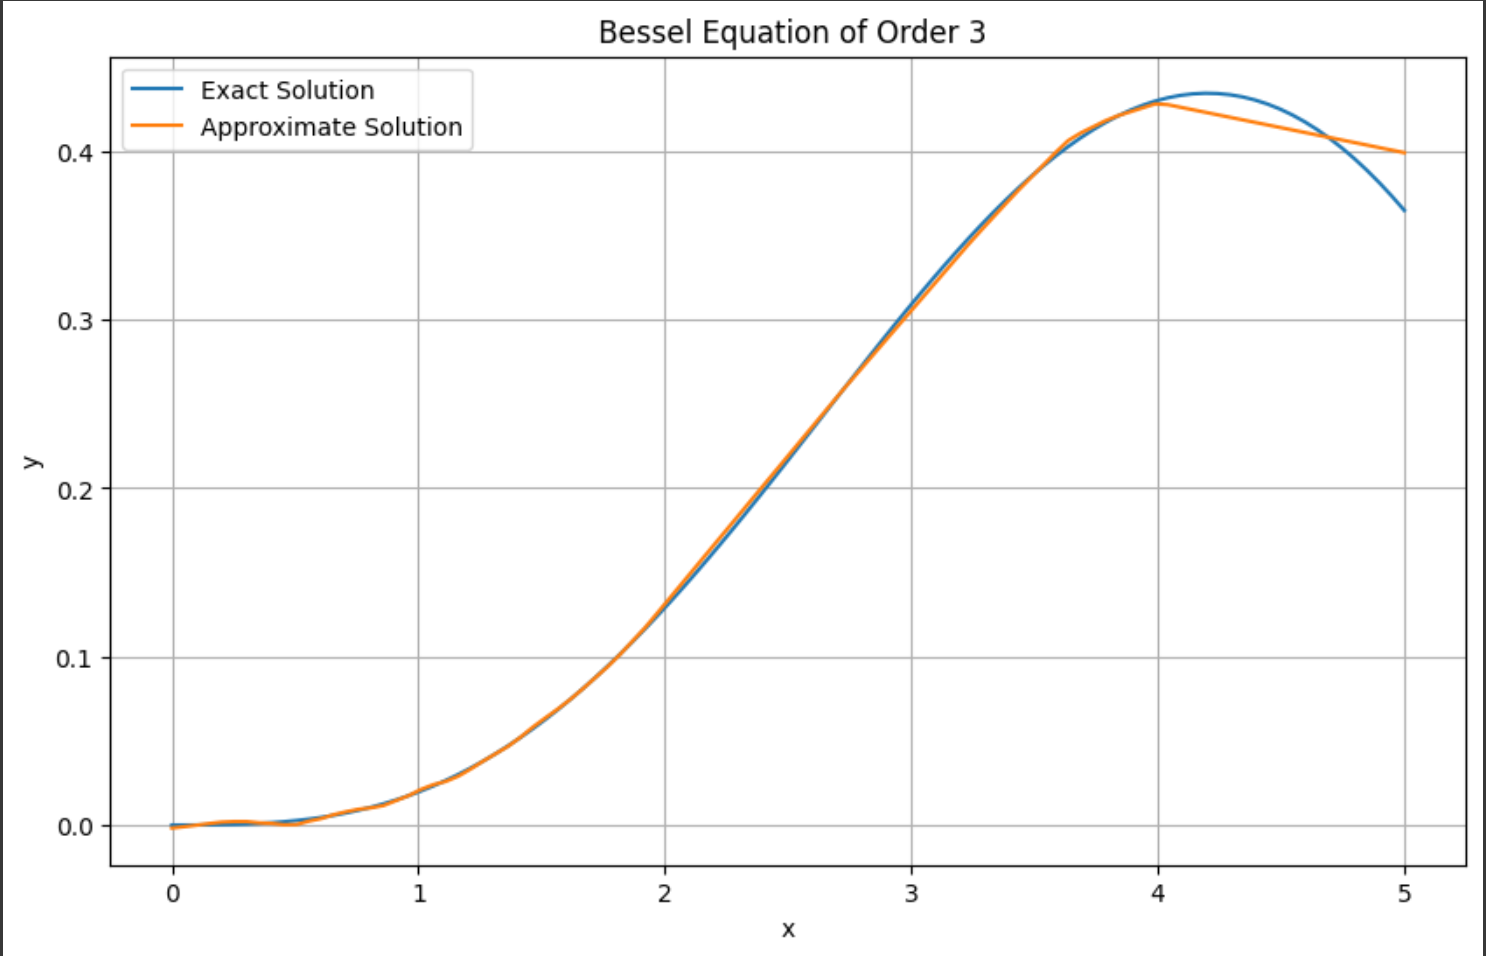

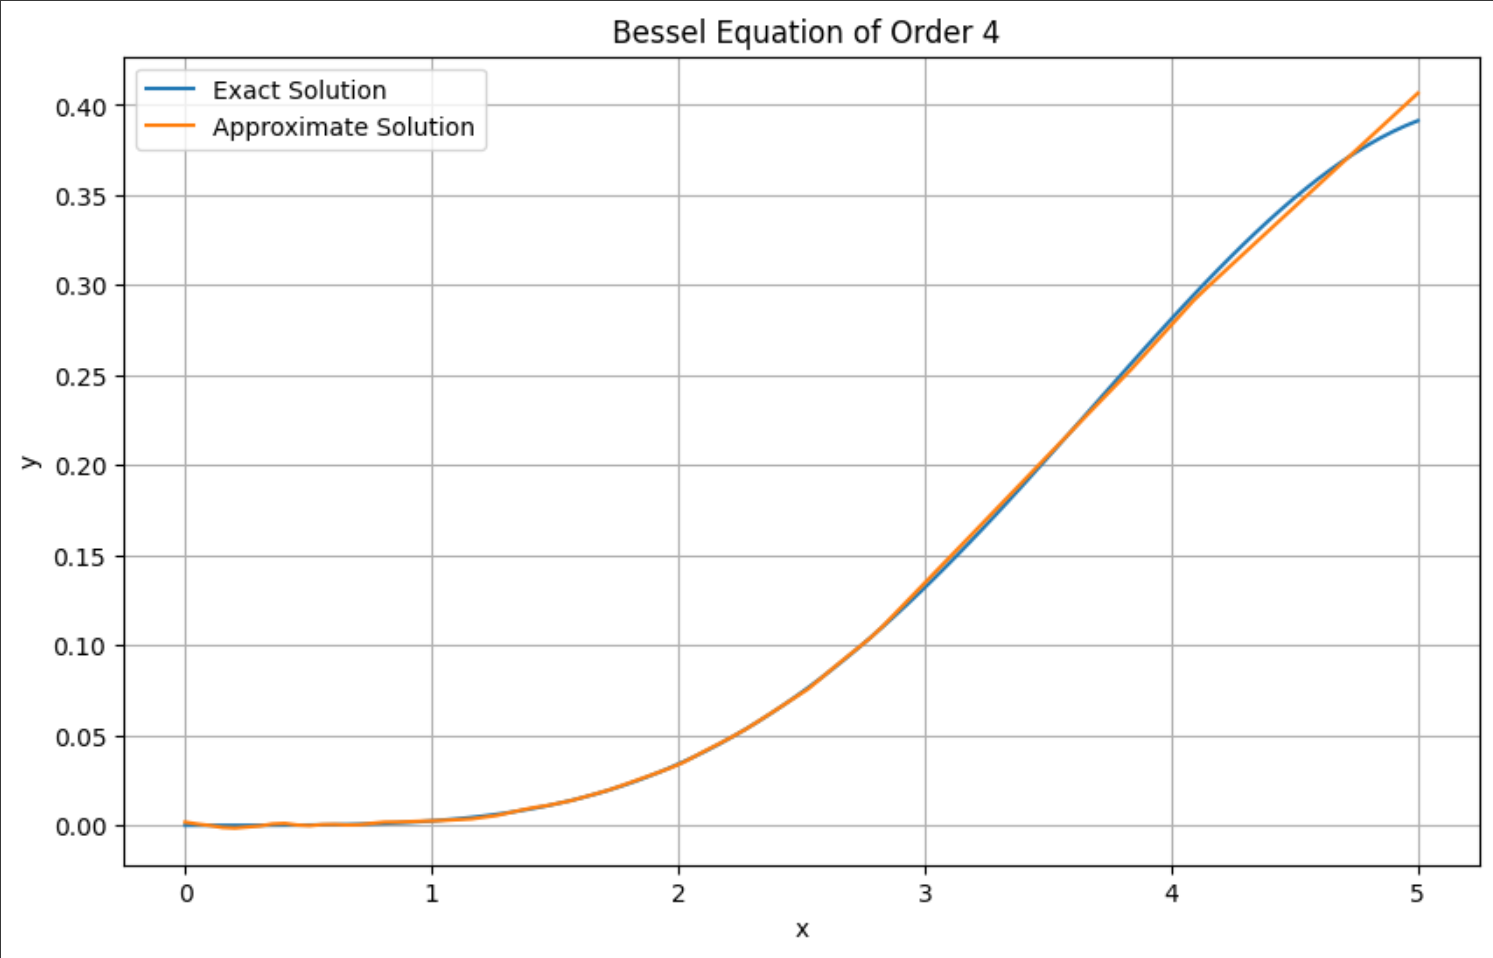